<a href="https://colab.research.google.com/github/SharikaJahanAunto/credit_score_classification/blob/main/Credit_Score_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV


# Loading the training dataset
data = pd.read_csv('/content/Bank_Data.csv')

# Displaying basic information about the dataset
print(data.info())

data.head()

# Checking for missing values
print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  object 
 1   Customer_ID               50000 non-null  object 
 2   Month                     50000 non-null  object 
 3   Name                      44985 non-null  object 
 4   Age                       50000 non-null  object 
 5   SSN                       50000 non-null  object 
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  object 
 8   Monthly_Inhand_Salary     42502 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  int64  
 10  Num_Credit_Card           50000 non-null  int64  
 11  Interest_Rate             50000 non-null  int64  
 12  Num_of_Loan               50000 non-null  object 
 13  Type_of_Loan              44296 non-null  object 
 14  Delay_

In [ ]:
# Handling missing values in numerical and categorical columns
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

# Imputing missing numerical values with the median
data['Monthly_Inhand_Salary'] = num_imputer.fit_transform(data[['Monthly_Inhand_Salary']])
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')
data['Age'] = num_imputer.fit_transform(data[['Age']])

# Imputing missing categorical values with the mode
# Converting the DataFrame to a Series using .ravel()
data['Occupation'] = cat_imputer.fit_transform(data['Occupation'].values.reshape(-1, 1)).ravel()

# Encoding categorical variables
label_encoder = LabelEncoder()
data['Credit_Mix'] = label_encoder.fit_transform(data['Credit_Mix'])
data['Payment_Behaviour'] = label_encoder.fit_transform(data['Payment_Behaviour'])
data['Occupation'] = label_encoder.fit_transform(data['Occupation'])

# Dropping unnecessary columns (e.g., ID, Name, SSN, Month)
data.drop(columns=['ID', 'Customer_ID', 'Name', 'SSN', 'Month'], inplace=True)

# Checking the cleaned data
data.head()


,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,23.0,12,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,...,2022.0,1,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,6,186.26670208571772
1,24.0,12,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,...,4.0,1,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,2,361.44400385378196
2,24.0,12,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,...,4.0,1,809.98,33.811894,NaN,No,49.574949,148.23393788500925,5,264.67544623342997
3,34.0,12,19114.12,3086.305000,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,...,4.0,1,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,2,343.82687322383634
4,28.0,15,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,...,5.0,1,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,1,485.2984336755923


In [ ]:
# Remove any trailing underscores from numerical columns
for col in X.select_dtypes(include=['number', 'object']):  # Include 'object' for mixed types
    X[col] = X[col].astype(str).str.replace('_', '')  # Remove all underscores, not just trailing
    X[col] = pd.to_numeric(X[col], errors='coerce')  # Convert to numeric, coercing errors to NaN

# Handle any NaN values that may have been introduced
X.fillna(X.mean(), inplace=True)

# Now proceed with the rest of the pipeline
y = data['Credit_Mix']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features for models like SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [ ]:
# Impute missing values with column mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Scale the features for models like SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred_log_reg = log_reg.predict(X_test_scaled)

# Evaluation
print("Logistic Regression Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg)}")
print(f"Precision: {precision_score(y_test, y_pred_log_reg, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_pred_log_reg, average='weighted')}")
print(f"F1 Score: {f1_score(y_test, y_pred_log_reg, average='weighted')}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_log_reg)}")


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['Type_of_Loan' 'Credit_History_Age' 'Payment_of_Min_Amount']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['Type_of_Loan' 'Credit_History_Age' 'Payment_of_Min_Amount']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


Logistic Regression Metrics:
Accuracy: 0.6119333333333333
Precision: 0.5447697217209789
Recall: 0.6119333333333333
F1 Score: 0.5610668027691398
Confusion Matrix:
[[2306   19  439  141]
 [   0 2571 1085   22]
 [ 256  794 4205  218]
 [ 644  828 1375   97]]


In [ ]:
# Random Forest
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_scaled, y_train)

# Predictions
y_pred_rf = rf_clf.predict(X_test_scaled)

# Evaluation
print("Random Forest Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(f"Precision: {precision_score(y_test, y_pred_rf, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_pred_rf, average='weighted')}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf, average='weighted')}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_rf)}")


Random Forest Metrics:
Accuracy: 0.7583333333333333
Precision: 0.6588659424217121
Recall: 0.7583333333333333
F1 Score: 0.6892803836994902
Confusion Matrix:
[[2770    0   59   76]
 [   0 3412  191   75]
 [  89  116 5122  146]
 [ 705  835 1333   71]]


In [ ]:
# SVM Classifier
svm_clf = SVC()
svm_clf.fit(X_train_scaled, y_train)

# Predictions
y_pred_svm = svm_clf.predict(X_test_scaled)

# Evaluation
print("SVM Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm)}")
print(f"Precision: {precision_score(y_test, y_pred_svm, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_pred_svm, average='weighted')}")
print(f"F1 Score: {f1_score(y_test, y_pred_svm, average='weighted')}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_svm)}")


SVM Metrics:
Accuracy: 0.6425333333333333
Precision: 0.5406858870692177
Recall: 0.6425333333333333
F1 Score: 0.5734488425552895
Confusion Matrix:
[[2504    7  387    7]
 [   7 2791  878    2]
 [ 264  862 4341    6]
 [ 702  864 1376    2]]


In [ ]:
# XGBoost Classifier
xgb_clf = XGBClassifier(random_state=42)
xgb_clf.fit(X_train_scaled, y_train)

# Predictions
y_pred_xgb = xgb_clf.predict(X_test_scaled)

# Evaluation
print("XGBoost Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb)}")
print(f"Precision: {precision_score(y_test, y_pred_xgb, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_pred_xgb, average='weighted')}")
print(f"F1 Score: {f1_score(y_test, y_pred_xgb, average='weighted')}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_xgb)}")


XGBoost Metrics:
Accuracy: 0.7535333333333334
Precision: 0.6474628120956809
Recall: 0.7535333333333334
F1 Score: 0.6788564673676807
Confusion Matrix:
[[2765    0   94   46]
 [   0 3365  258   55]
 [ 110  164 5137   62]
 [ 709  843 1356   36]]


In [ ]:
# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search_rf = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=3, verbose=2, n_jobs=-1)
grid_search_rf.fit(X_train_scaled, y_train)

# Best hyperparameters
print(f"Best Parameters: {grid_search_rf.best_params_}")

# Re-training with best hyperparameters
best_rf = grid_search_rf.best_estimator_
best_rf.fit(X_train_scaled, y_train)

# Predictions
y_pred_best_rf = best_rf.predict(X_test_scaled)

# Evaluation
print("Tuned Random Forest Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best_rf)}")
print(f"Precision: {precision_score(y_test, y_pred_best_rf, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_pred_best_rf, average='weighted')}")
print(f"F1 Score: {f1_score(y_test, y_pred_best_rf, average='weighted')}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_best_rf)}")


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Parameters: {'max_depth': 30, 'min_samples_split': 10, 'n_estimators': 300}
Tuned Random Forest Metrics:
Accuracy: 0.7628
Precision: 0.6585495522620276
Recall: 0.7628
F1 Score: 0.683492818035712
Confusion Matrix:
[[2828    0   65   12]
 [   0 3416  244   18]
 [ 103  150 5178   42]
 [ 720  840 1364   20]]


In [ ]:
# Check the shapes
print(f"Number of features in X_train: {X_train.shape[1]}")
print(f"Number of features in feature importances: {len(importances)}")

# If there is a mismatch, check if some columns were dropped during training
print(f"Columns in X_train: {X_train.columns}")


Number of features in X_train: 21
Number of features in feature importances: 18
Columns in X_train: Index(['Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')


In [ ]:
if X_train.shape[1] == len(importances):
    plt.figure(figsize=(10, 6))
    plt.title("Feature Importance in Random Forest")

    # Plot the feature importances
    plt.bar(range(len(importances)), importances[indices], align='center')

    # Match the original feature names as much as possible to the reduced features
    plt.xticks(range(len(importances)), X.columns[indices][:len(importances)], rotation=90)

    plt.tight_layout()
    plt.show()
else:
    print(f"Mismatch between feature importances and features in X_train. Check encoding/transformation steps.")


Mismatch between feature importances and features in X_train. Check encoding/transformation steps.


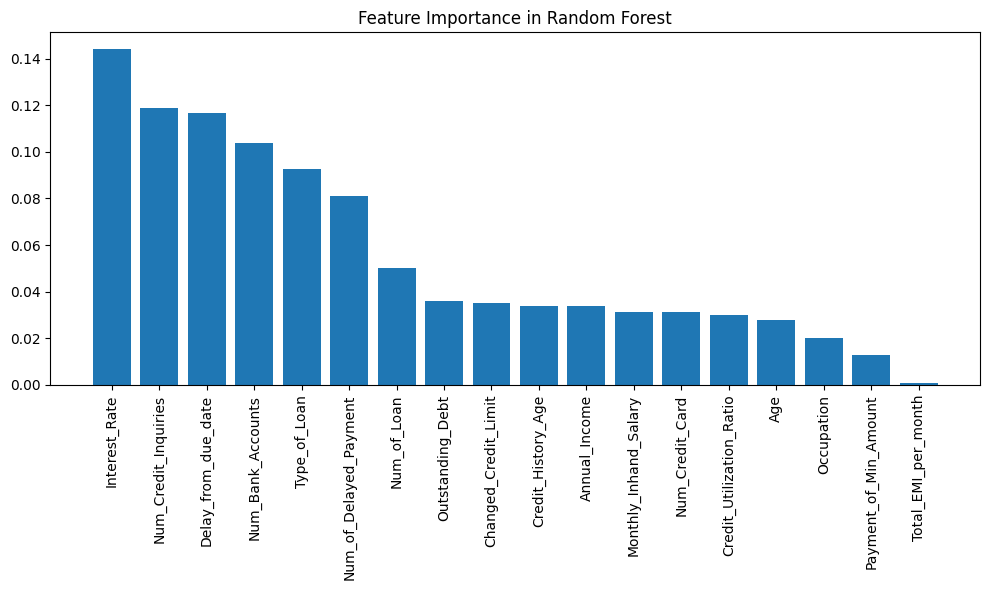

In [ ]:
# Feature Importances
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importance in Random Forest")

# Ensure the number of features in X_train and importances match before plotting
num_features = min(X_train.shape[1], len(importances))

# Plot the feature importances with matched indices
plt.bar(range(num_features), importances[indices][:num_features], align='center')

# Display the correct feature names for the top features
plt.xticks(range(num_features), X.columns[indices][:num_features], rotation=90)

plt.tight_layout()
plt.show()
